# Set 1
## Load data

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from tqdm import tqdm

import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [3]:
top_performers = pd.DataFrame()

# Combine

In [4]:
def cluster_plot_bokeh(grid):
    line_dash = ['solid', 'dashed', 'dotted', 'dotdash']
    color = ['blue', 'red', 'hotpink', 'green']
    p = figure(width=1400, height=500, x_axis_label='Number clusters', y_axis_label='Correlation silhouette score')
    p1 = figure(width=1400, height=500, x_axis_label='Number clusters', y_axis_label='Euclidian silhouette score')
    for i, alg in enumerate(grid):
        df = grid[alg].groupby(['n_clusters']).max().reset_index()
        df = df.sort_values('n_clusters')
        source = ColumnDataSource(df)
        p.line('n_clusters', 'silhouette_score_correlation', source=source,
                    legend_label=f'silhouette score {alg}', color=color[i])
        p1.line('n_clusters', 'silhouette_score_euclidean', source=source,
                    legend_label=f'silhouette score {alg}', color=color[i])

    p.add_layout(p.legend[0], 'right')
    p.legend.click_policy="hide"
    p1.add_layout(p1.legend[0], 'right')
    p1.legend.click_policy="hide"
    return column(p, p1)

In [5]:
pd.options.display.width = 100
def get_individual_score(grid, i):
    top_df = []
    for alg in grid:
        print(f'_________________________________________{alg}_________________________________________')
        print()
        df = grid[alg].copy()
        if 'silhouette_score_manhattan' in df.columns:
            df = df.drop('silhouette_score_manhattan', axis=1)
        if 'calinski_harabasz_score' in df.columns:
            df = df.drop('calinski_harabasz_score', axis=1)
        if 'Fit_Time' in df.columns:
            df = df.drop('Fit_Time', axis=1)
        print(f'                        -----------------mean------------------')
        value1 = MinMaxScaler().fit_transform(df['silhouette_score_correlation'].values.reshape(-1, 1))
        value2 = MinMaxScaler().fit_transform(df['silhouette_score_euclidean'].values.reshape(-1, 1))
        df['mean'] = (value1 + value2) / 2
        #df = df.drop(['silhouette_score_correlation', 'silhouette_score_euclidean'], axis=1)
        df = df.sort_values(by='mean', ascending=False)
        df = df.drop('mean', axis=1)
        print(df.head(3))
        print()
        top_df.append([alg, df['silhouette_score_correlation'].values[0], df['silhouette_score_euclidean'].values[0]])
    with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{i}/baseline_df.pkl', 'rb') as f:
        baseline = pickle.load(f)
    top_df.append(['Baseline', baseline['silhouette_score_correlation'].values[0], 
                   baseline['silhouette_score_euclidean'].values[0]])
    print('_________________________________________BEST_________________________________________')
    top_df = pd.DataFrame.from_records(top_df, columns=['Algorithm', 'silhouette_score_correlation', 
                                                      'silhouette_score_euclidean'])
    print(top_df)
    top_df['Set'] = i
    return top_df

In [6]:
def get_results_plot(grid, i, end=15):
    plot_df = pd.DataFrame()
    for alg in grid:
        df = grid[alg].groupby(['n_clusters']).max().reset_index()
        df = df.sort_values('n_clusters')[['n_clusters','silhouette_score_euclidean', 'silhouette_score_correlation']]
        df['algorithm'] = alg
        plot_df = pd.concat([plot_df, df], ignore_index=True)
    plot_df = plot_df.dropna()
    # Add the baselilne
    with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{i}/baseline_df.pkl', 'rb') as f:
        df = pickle.load(f)    
    plot_df = pd.concat([plot_df, df], ignore_index=True)
    fig, axs = plt.subplots(2,1,  figsize=(20,10), sharex=True)
    axs[0].set_xlim(2, end)
    axs[1].set_xlim(2, end)
    g = sns.lineplot(data=plot_df, x='n_clusters', y='silhouette_score_euclidean', hue='algorithm', ax=axs[0])
    g1 = sns.lineplot(data=plot_df, x='n_clusters', y='silhouette_score_correlation', hue='algorithm', ax=axs[1], legend=False)
    fig.suptitle(f'Set {i}', fontsize=24)
    plt.show()
    return plot_df

# Set 1

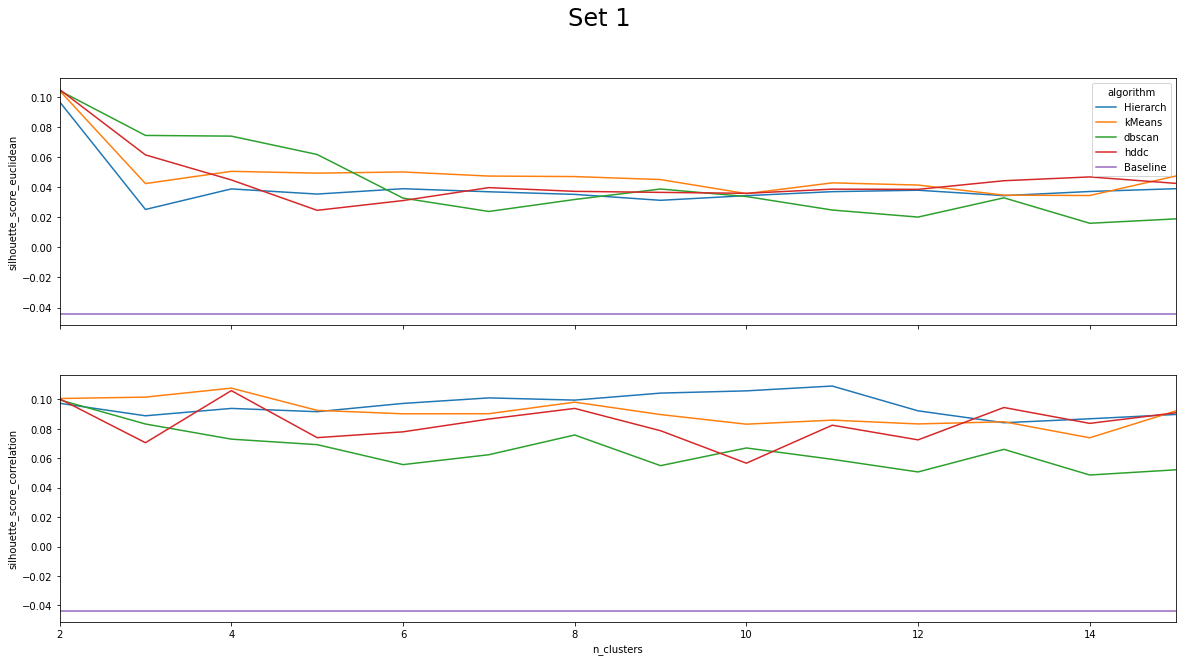

In [7]:
i = 1
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{i}/Merged_results.pkl', 'rb') as f:
    results_grid = pickle.load(f)
end_df = get_results_plot(results_grid, i)

In [8]:
top_df = get_individual_score(results_grid, i)

_________________________________________Hierarch_________________________________________

                        -----------------mean------------------
    n_clusters  silhouette_score_euclidean  silhouette_score_correlation
13           2                    0.096876                      0.097234
5           11                    0.037080                      0.108922
6           10                    0.034417                      0.105647

_________________________________________kMeans_________________________________________

                        -----------------mean------------------
   silhouette_score_euclidean  silhouette_score_correlation  n_clusters  batch_size
2                    0.104322                      0.099542           2         512
3                    0.104322                      0.099542           2        1024
1                    0.104322                      0.099542           2         256

_________________________________________dbscan_____________

In [9]:
top_performers = pd.concat([top_performers, top_df])
top_performers

,Algorithm,silhouette_score_correlation,silhouette_score_euclidean,Set
0,Hierarch,0.097234,0.096876,1
1,kMeans,0.099542,0.104322,1
2,dbscan,0.099542,0.104322,1
3,hddc,0.100257,0.105046,1
4,Baseline,-0.043530,-0.044426,1


# Set2

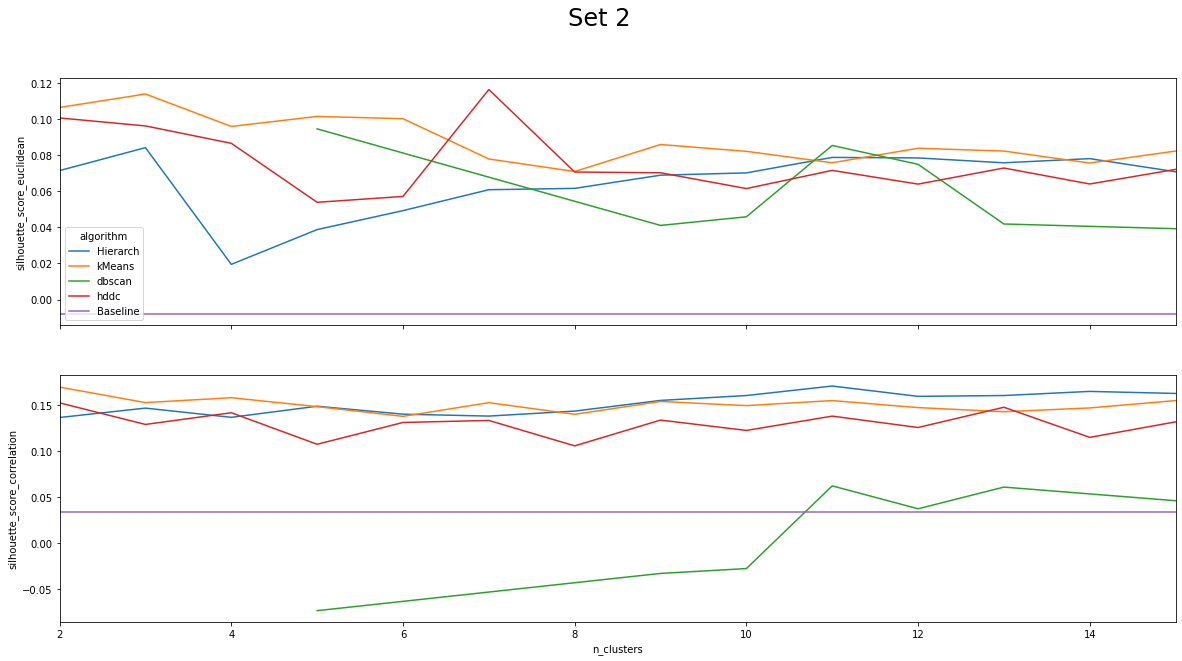

In [10]:
i = 2
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{i}/Merged_results.pkl', 'rb') as f:
    results_grid = pickle.load(f)
end_df = get_results_plot(results_grid, i,15)

In [11]:
top_df = get_individual_score(results_grid, i)

_________________________________________Hierarch_________________________________________

                        -----------------mean------------------
   n_clusters  silhouette_score_euclidean  silhouette_score_correlation
5          11                    0.078743                      0.170815
7          14                    0.078069                      0.164967
4          12                    0.078446                      0.159587

_________________________________________kMeans_________________________________________

                        -----------------mean------------------
   silhouette_score_euclidean  silhouette_score_correlation  n_clusters  batch_size
2                    0.106415                      0.168410           2         512
0                    0.104697                      0.167795           2         128
1                    0.099814                      0.169664           2         256

_________________________________________dbscan_________________

In [12]:
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet2/Merged_GridHDDC.pkl', 'rb') as f:
    grid = pickle.load(f)
grid[grid['K']==2]

,model,K,threshold,LL,BIC,ICL,rank,complexity
12,1.0,2.0,0.01,-3.997821e+08,-8.073990e+08,-8.073990e+08,15,785054.0
13,1.0,2.0,0.10,-4.816348e+08,-9.656210e+08,-9.656210e+08,38,235604.0
14,1.0,2.0,0.20,-5.189532e+08,-1.039278e+09,-1.039278e+09,42,137446.0


In [13]:
top_performers = pd.concat([top_performers, top_df])

# Set4

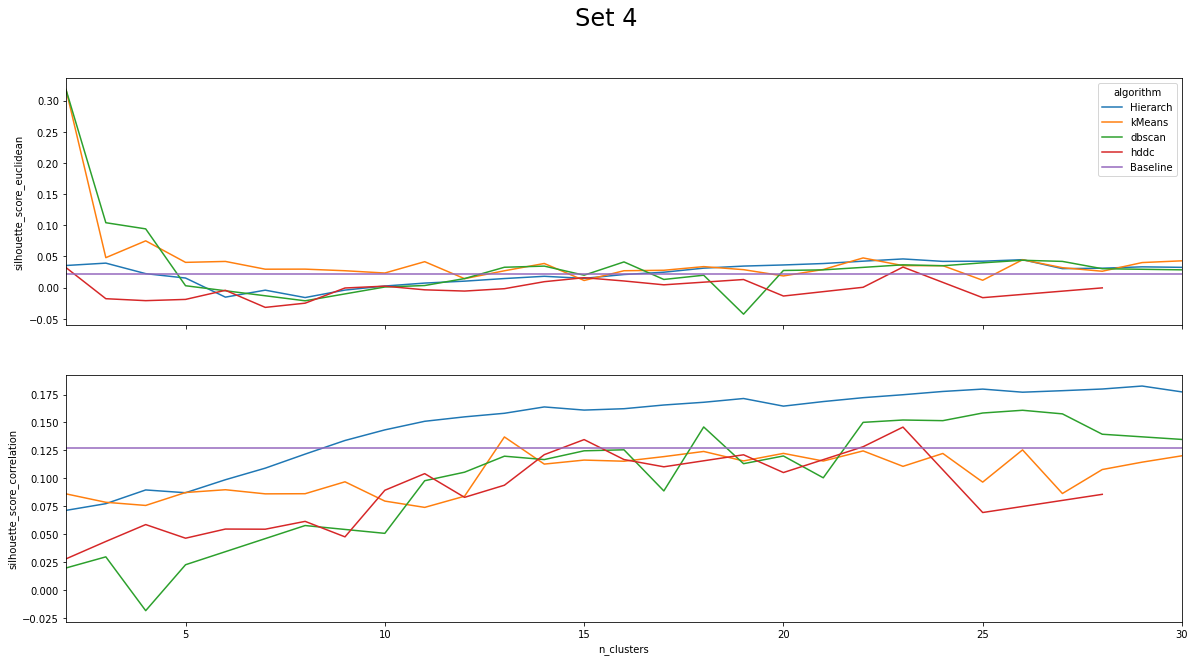

In [14]:
i = 4
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{i}/Merged_results.pkl', 'rb') as f:
    results_grid = pickle.load(f)
end_df = get_results_plot(results_grid, i, 30)

In [15]:
top_df = get_individual_score(results_grid, i)

_________________________________________Hierarch_________________________________________

                        -----------------mean------------------
    n_clusters  silhouette_score_euclidean  silhouette_score_correlation
14          26                    0.044681                      0.177098
3           23                    0.045890                      0.174826
24          25                    0.042254                      0.179879

_________________________________________kMeans_________________________________________

                        -----------------mean------------------
    silhouette_score_euclidean  silhouette_score_correlation  n_clusters  batch_size
46                    0.017081                      0.136988          13         512
99                    0.044580                      0.125394          26        1024
82                    0.047497                      0.124477          22         512

_________________________________________dbscan_________

In [16]:
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet4/Merged_GridHDDC.pkl', 'rb') as f:
    grid = pickle.load(f)
grid[grid['K']==19]

,model,K,threshold,LL,BIC,ICL,rank,complexity,comment
129,1.0,19.0,0.01,-1.893872e+08,-4.565809e+08,-4.565809e+08,57,8376323.0,0
130,1.0,19.0,0.2,-2.260699e+08,-4.707020e+08,-4.707020e+08,113,1998323.0,0


In [17]:
top_performers = pd.concat([top_performers, top_df])

# Combine

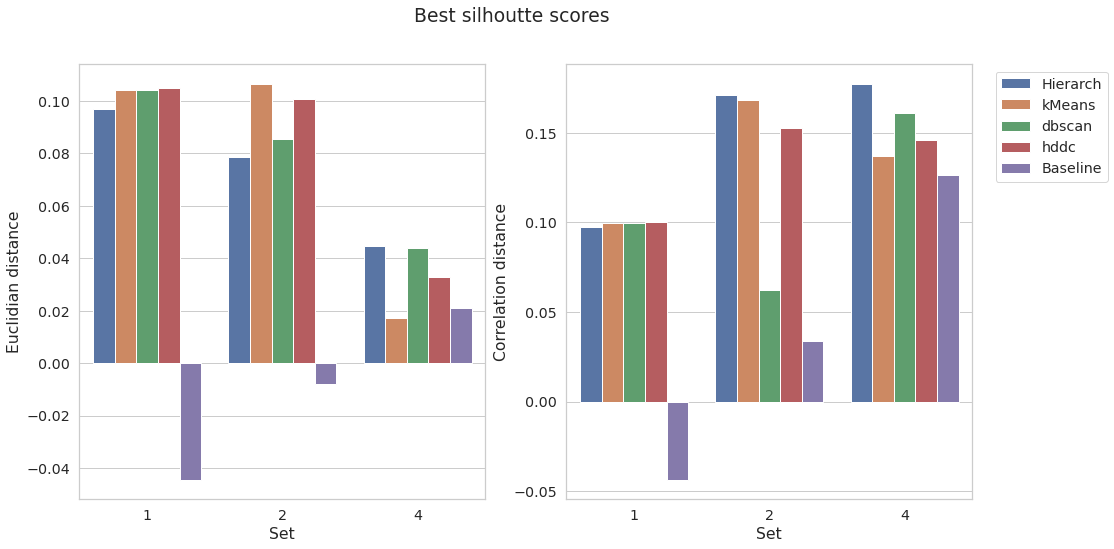

In [57]:
import seaborn as sns
sns.set(font_scale = 1.3,style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

sns.barplot(x="Set", y="silhouette_score_euclidean", hue="Algorithm", data=top_performers, ax=ax1)
sns.barplot(x="Set", y="silhouette_score_correlation", hue="Algorithm", data=top_performers, ax=ax2)

ax1.get_legend().remove()
ax1.set_ylabel('Euclidian distance')
ax2.set_ylabel('Correlation distance')
ax2.legend(bbox_to_anchor=(1.04,1), loc="upper left")
fig.suptitle('Best silhoutte scores')
plt.savefig(f'Results/Best_Scores.svg', dpi=1200)
